In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer,OrdinalEncoder
from xverse.transformer import WOE
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, plot_confusion_matrix, accuracy_score

from imblearn.over_sampling import SMOTE
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
import warnings 
warnings.filterwarnings("ignore")
plt.rcParams['figure.figsize']=[15,8]

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import cross_val_score
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [3]:
from yellowbrick.model_selection import FeatureImportances

In [4]:
xtrain = pd.read_csv("xtrain_final.csv")
xtest = pd.read_csv("xtest_final.csv")
ytrain = pd.read_csv("ytrain_final.csv")
ytest = pd.read_csv("ytest_final.csv")

In [5]:
xtrain.shape, xtest.shape

((52270, 37), (13068, 37))

In [14]:
xtrain.head()

,Monthly_Income,Existing_EMI,Loan_Amount,Loan_Period,Interest_Rate,loan_period_months,emi_recal,EMI-Monthly_Income_Ratio,Income_loan_Ratio,Var1,City_Code,Source,Gender,Contacted,Primary_Bank_Type,City_Category_B,City_Category_C,Employer_Category1_B,Employer_Category1_C,Source_Category_B,Source_Category_C,Source_Category_D,Source_Category_E,Source_Category_F,Source_Category_G,Age_Cat_Middle-Aged,Age_Cat_Old,Age_Cat_Young,Employer_Cat3_MSF,Employer_Cat3_MSME,Employer_Cat3_PVT,Employer_Cat3_VSF,Employer_Category2,IR_15-20,IR_20-25,IR_25+,Quarter_Q2,Quarter_Q3,Quarter_Q4
0,1680.0,0.0,19600,3.0,18.040,40.8,646,0.384524,0.879263,0,0.148588,0.059791,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,4,1,0,0,0,0,1
1,1350.0,0.0,30000,5.0,20.000,60.0,795,0.588889,1.597424,2,-0.267721,0.059791,1,1,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,4,1,0,0,0,1,0
2,5200.0,0.0,90000,4.0,15.108,52.8,2344,0.450769,1.266409,10,0.148588,0.059791,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,0,0,0,1
3,1500.0,0.0,22000,4.0,35.500,48.0,864,0.576000,1.085929,0,-0.267721,-0.279869,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,4,0,0,1,0,0,0
4,1500.0,600.0,11000,5.0,20.000,60.0,291,0.594000,0.527150,2,0.034822,0.059791,1,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,4,1,0,0,0,0,1


In [15]:
xtrain.shape

(52270, 39)

In [17]:
%matplotlib inline

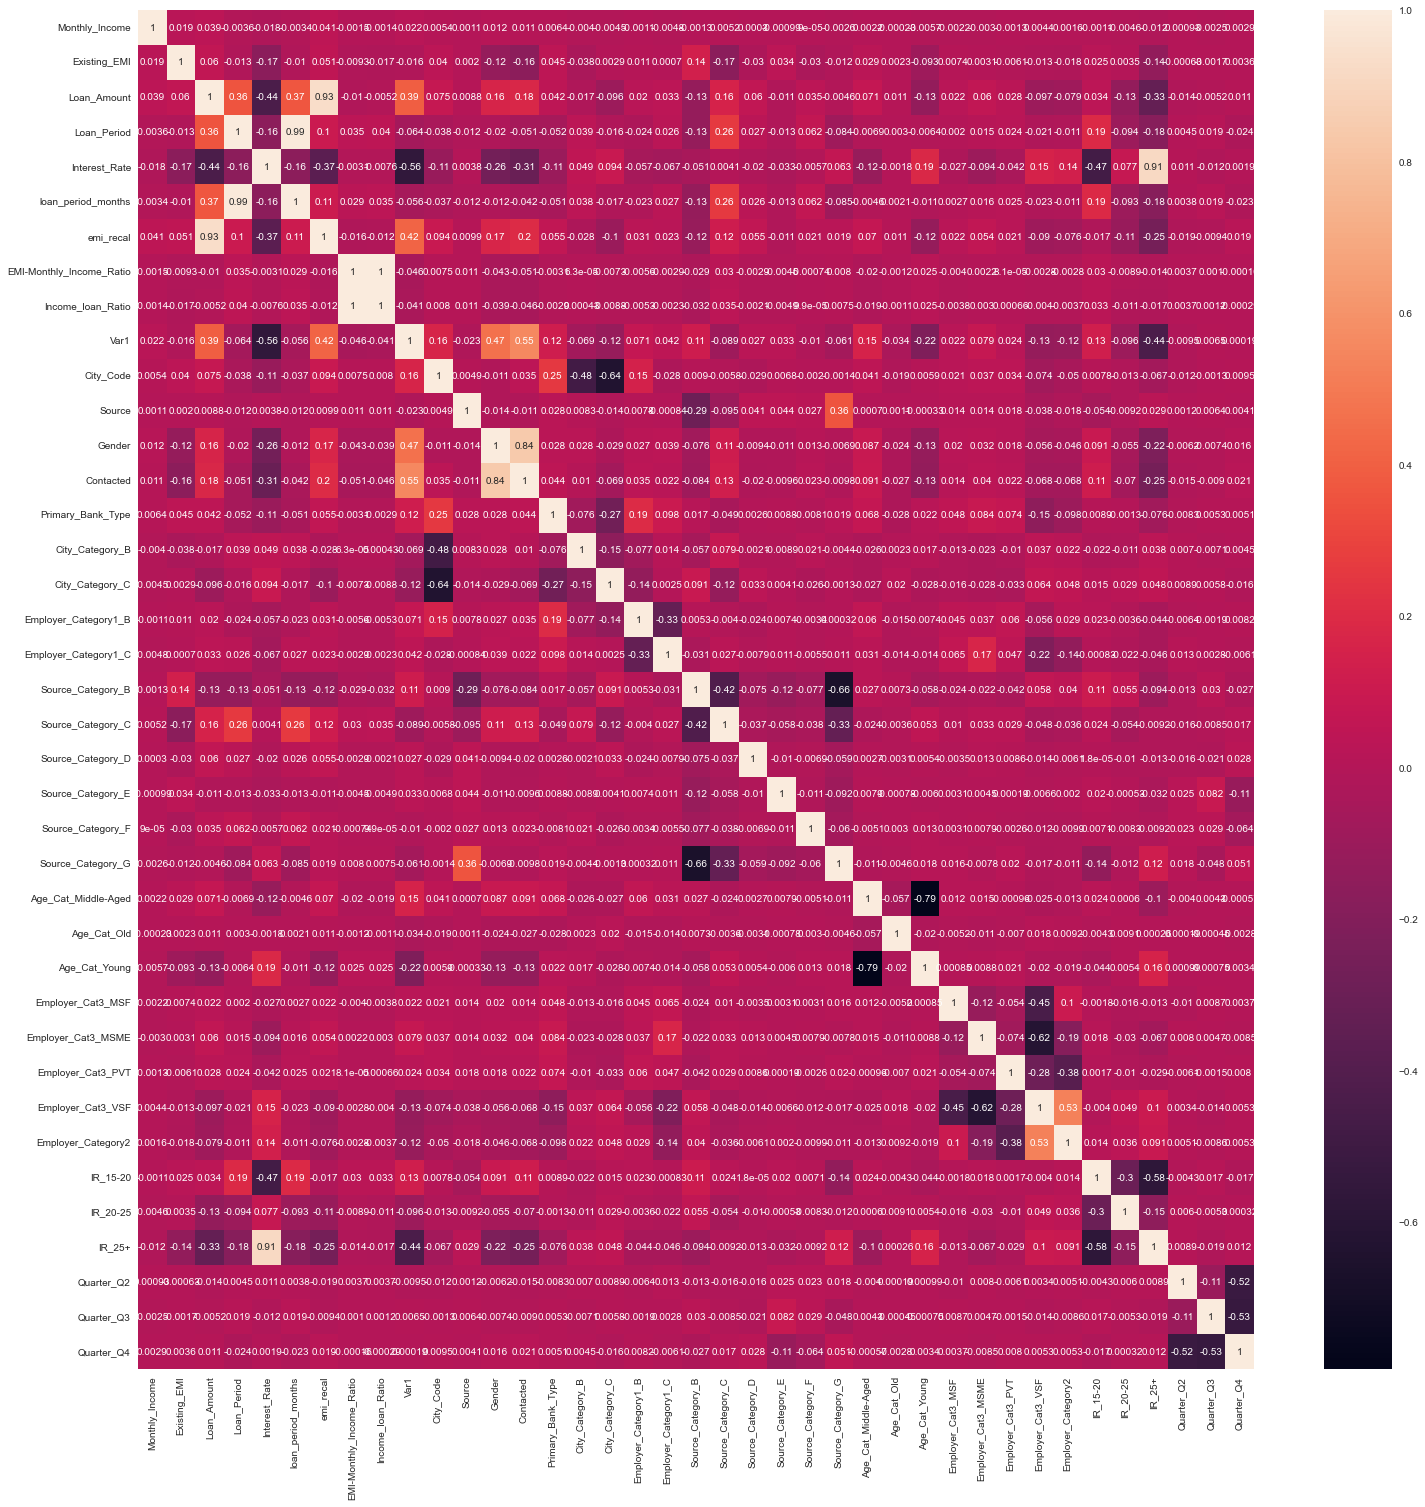

In [20]:
plt.rcParams['figure.figsize'] = [25, 25]
sns.heatmap(xtrain.corr(), annot=True)
plt.show()

In [21]:
# Loan_Amount - emi_recal, Loan_Period - Loan_Period_months, contatced - gender, Interest_rate and its bins,
# Employer_cat_VSF - Employer_Cat2, Interest_rate - Var1, City_Code - City_Category_C, Source_Category_G - Source_Cat_B
# are some of the pairs which are showing moderate to high multicollinearity

In [25]:
vif = []

for i in range(xtrain.shape[1]) :
    vif.append(variance_inflation_factor(xtrain.values,i))
    
pd.DataFrame({'Feature' : xtrain.columns,'VIF' : vif}).sort_values(by = 'VIF', ascending = False)

,Feature,VIF
7,EMI-Monthly_Income_Ratio,3029.532073
8,Income_loan_Ratio,3026.016649
5,loan_period_months,1041.207029
3,Loan_Period,988.692697
4,Interest_Rate,152.292400
19,Source_Category_B,82.124050
32,Employer_Category2,64.877397
24,Source_Category_G,60.479741
6,emi_recal,48.283959
2,Loan_Amount,48.145662


In [27]:
xtrain1 = xtrain.drop('EMI-Monthly_Income_Ratio', axis=1)

vif = []

for i in range(xtrain1.shape[1]) :
    vif.append(variance_inflation_factor(xtrain1.values,i))
    
pd.DataFrame({'Feature' : xtrain1.columns,'VIF' : vif}).sort_values(by = 'VIF', ascending = False)

,Feature,VIF
5,loan_period_months,1041.185171
3,Loan_Period,987.873282
4,Interest_Rate,151.875183
18,Source_Category_B,81.654871
31,Employer_Category2,64.877385
23,Source_Category_G,60.178871
6,emi_recal,48.283534
2,Loan_Amount,48.117923
30,Employer_Cat3_VSF,36.976998
19,Source_Category_C,32.403685


In [28]:
xtrain2 = xtrain1.drop('loan_period_months', axis=1)

vif = []

for i in range(xtrain2.shape[1]) :
    vif.append(variance_inflation_factor(xtrain2.values,i))
    
pd.DataFrame({'Feature' : xtrain2.columns,'VIF' : vif}).sort_values(by = 'VIF', ascending = False)

,Feature,VIF
4,Interest_Rate,151.816574
17,Source_Category_B,80.852271
30,Employer_Category2,64.876668
22,Source_Category_G,59.588324
5,emi_recal,47.108040
2,Loan_Amount,46.780560
29,Employer_Cat3_VSF,36.976847
3,Loan_Period,36.844245
18,Source_Category_C,32.051741
33,IR_25+,22.398319


In [29]:
xtrain3 = xtrain2.drop('Interest_Rate', axis=1)

vif = []

for i in range(xtrain3.shape[1]) :
    vif.append(variance_inflation_factor(xtrain3.values,i))
    
pd.DataFrame({'Feature' : xtrain3.columns,'VIF' : vif}).sort_values(by = 'VIF', ascending = False)

,Feature,VIF
29,Employer_Category2,64.864867
16,Source_Category_B,48.503285
4,emi_recal,46.867716
2,Loan_Amount,46.221260
28,Employer_Cat3_VSF,36.941950
21,Source_Category_G,36.645376
3,Loan_Period,36.505398
17,Source_Category_C,19.908942
10,Contacted,11.506691
35,Quarter_Q4,9.504945


In [30]:
xtrain4 = xtrain3.drop('Employer_Category2', axis=1)

vif = []

for i in range(xtrain4.shape[1]) :
    vif.append(variance_inflation_factor(xtrain4.values,i))
    
pd.DataFrame({'Feature' : xtrain4.columns,'VIF' : vif}).sort_values(by = 'VIF', ascending = False)

,Feature,VIF
4,emi_recal,46.865791
2,Loan_Amount,46.218411
16,Source_Category_B,44.468699
3,Loan_Period,36.505377
21,Source_Category_G,33.641071
17,Source_Category_C,18.435536
28,Employer_Cat3_VSF,16.505071
10,Contacted,11.503325
34,Quarter_Q4,9.504455
22,Age_Cat_Middle-Aged,9.374245


In [31]:
xtrain5 = xtrain4.drop('emi_recal', axis=1)

vif = []

for i in range(xtrain5.shape[1]) :
    vif.append(variance_inflation_factor(xtrain5.values,i))
    
pd.DataFrame({'Feature' : xtrain5.columns,'VIF' : vif}).sort_values(by = 'VIF', ascending = False)

,Feature,VIF
15,Source_Category_B,37.661919
20,Source_Category_G,28.281374
3,Loan_Period,20.182046
27,Employer_Cat3_VSF,16.504762
16,Source_Category_C,15.472283
9,Contacted,11.501711
33,Quarter_Q4,9.504447
21,Age_Cat_Middle-Aged,9.373154
8,Gender,7.949069
28,IR_15-20,5.118991


In [32]:
xtrain6 = xtrain5.drop('Source_Category_B', axis=1)

vif = []

for i in range(xtrain6.shape[1]) :
    vif.append(variance_inflation_factor(xtrain6.values,i))
    
pd.DataFrame({'Feature' : xtrain6.columns,'VIF' : vif}).sort_values(by = 'VIF', ascending = False)

,Feature,VIF
3,Loan_Period,16.258140
26,Employer_Cat3_VSF,12.303169
9,Contacted,11.366232
32,Quarter_Q4,8.334780
20,Age_Cat_Middle-Aged,8.092376
8,Gender,7.938176
27,IR_15-20,4.742700
5,Var1,4.695365
2,Loan_Amount,4.343172
6,City_Code,4.064466


In [33]:
xtrain7 = xtrain6.drop('Loan_Period', axis=1)

vif = []

for i in range(xtrain7.shape[1]) :
    vif.append(variance_inflation_factor(xtrain7.values,i))
    
pd.DataFrame({'Feature' : xtrain7.columns,'VIF' : vif}).sort_values(by = 'VIF', ascending = False)

,Feature,VIF
8,Contacted,11.361138
25,Employer_Cat3_VSF,11.247381
31,Quarter_Q4,8.092913
7,Gender,7.933950
19,Age_Cat_Middle-Aged,7.797075
4,Var1,4.676501
26,IR_15-20,4.387778
5,City_Code,4.061179
11,City_Category_C,3.871060
2,Loan_Amount,3.556127


In [34]:
xtrain8 = xtrain7.drop('Contacted', axis=1)

vif = []

for i in range(xtrain8.shape[1]) :
    vif.append(variance_inflation_factor(xtrain8.values,i))
    
pd.DataFrame({'Feature' : xtrain8.columns,'VIF' : vif}).sort_values(by = 'VIF', ascending = False)

,Feature,VIF
24,Employer_Cat3_VSF,11.218260
30,Quarter_Q4,8.078901
18,Age_Cat_Middle-Aged,7.794295
25,IR_15-20,4.374429
4,Var1,4.113728
5,City_Code,4.061086
10,City_Category_C,3.870957
2,Loan_Amount,3.546305
8,Primary_Bank_Type,3.455351
27,IR_25+,3.277687


In [35]:
xtrain9 = xtrain8.drop('Employer_Cat3_VS', axis=1)

vif = []

for i in range(xtrain9.shape[1]) :
    vif.append(variance_inflation_factor(xtrain9.values,i))
    
pd.DataFrame({'Feature' : xtrain9.columns,'VIF' : vif}).sort_values(by = 'VIF', ascending = False)

,Feature,VIF
29,Quarter_Q4,7.363238
18,Age_Cat_Middle-Aged,7.296558
4,Var1,4.069912
5,City_Code,4.040327
10,City_Category_C,3.800254
24,IR_15-20,3.736026
8,Primary_Bank_Type,3.449361
2,Loan_Amount,3.419294
7,Gender,3.109381
20,Age_Cat_Young,3.080115


In [36]:
xtrain10 = xtrain9.drop('Quarter_Q4', axis=1)

vif = []

for i in range(xtrain10.shape[1]) :
    vif.append(variance_inflation_factor(xtrain10.values,i))
    
pd.DataFrame({'Feature' : xtrain10.columns,'VIF' : vif}).sort_values(by = 'VIF', ascending = False)

,Feature,VIF
18,Age_Cat_Middle-Aged,6.666404
5,City_Code,4.020648
4,Var1,3.980976
10,City_Category_C,3.746337
8,Primary_Bank_Type,3.422731
24,IR_15-20,3.381233
2,Loan_Amount,3.323173
7,Gender,3.093820
20,Age_Cat_Young,2.852006
9,City_Category_B,2.626058


In [37]:
xtrain11 = xtrain10.drop('Age_Cat_Middle-Aged', axis=1)

vif = []

for i in range(xtrain11.shape[1]) :
    vif.append(variance_inflation_factor(xtrain11.values,i))
    
pd.DataFrame({'Feature' : xtrain11.columns,'VIF' : vif}).sort_values(by = 'VIF', ascending = False)

,Feature,VIF
5,City_Code,3.972445
4,Var1,3.867724
10,City_Category_C,3.666159
2,Loan_Amount,3.216991
8,Primary_Bank_Type,3.212840
7,Gender,3.083910
23,IR_15-20,2.715387
9,City_Category_B,2.584535
17,Source_Category_G,2.001910
25,IR_25+,1.898612


In [38]:
# Now, we don't seem to have much multi-collinearity left in our data and we can go on with our model

In [39]:
xtrain_new = xtrain11
xtest_new = xtest.drop(['EMI-Monthly_Income_Ratio', 'loan_period_months', 'Interest_Rate', 'Employer_Category2', 'emi_recal', 'Source_Category_B', 'Loan_Period', 'Contacted', 'Employer_Cat3_VS', 'Quarter_Q4', 'Age_Cat_Middle-Aged'], axis=1)

In [40]:
xtrain_new.shape, xtest_new.shape

((52270, 28), (13068, 28))

## Model

### Base Model

In [41]:
lr = LogisticRegression(class_weight='balanced')
lr.fit(xtrain_new, ytrain)
print(lr.score(xtrain_new, ytrain), lr.score(xtest_new, ytest))

ypred_train_lr = lr.predict(xtrain_new)
print(confusion_matrix(ytrain, ypred_train_lr))
print(classification_report(ytrain, ypred_train_lr))

ypred_test_lr = lr.predict(xtest_new)
print(confusion_matrix(ytest, ypred_test_lr))
print(classification_report(ytest, ypred_test_lr))

0.43240864740769086 0.4380165289256198
[[21894 29562]
 [  106   708]]
              precision    recall  f1-score   support

           0       1.00      0.43      0.60     51456
           1       0.02      0.87      0.05       814

    accuracy                           0.43     52270
   macro avg       0.51      0.65      0.32     52270
weighted avg       0.98      0.43      0.59     52270

[[5548 7319]
 [  25  176]]
              precision    recall  f1-score   support

           0       1.00      0.43      0.60     12867
           1       0.02      0.88      0.05       201

    accuracy                           0.44     13068
   macro avg       0.51      0.65      0.32     13068
weighted avg       0.98      0.44      0.59     13068



### Scaling

In [44]:
xtrain_num = xtrain_new.iloc[:, :4]
xtest_num = xtest_new.iloc[:, :4]

xtrain_cat = xtrain_new.iloc[:, 4:]
xtest_cat = xtest_new.iloc[:, 4:]

sc = StandardScaler()

xtrain_num_scaled = pd.DataFrame(sc.fit_transform(xtrain_num), columns=xtrain_num.columns)
xtrain_scaled = pd.concat([xtrain_num_scaled, xtrain_cat], axis=1)
print(xtrain_scaled.shape)

xtest_num_scaled = pd.DataFrame(sc.fit_transform(xtest_num), columns=xtest_num.columns)
xtest_scaled = pd.concat([xtest_num_scaled, xtest_cat], axis=1)
print(xtest_scaled.shape)

(52270, 28)
(13068, 28)


### Scaled Model

In [45]:
lr = LogisticRegression(class_weight='balanced')
lr.fit(xtrain_scaled, ytrain)
print(lr.score(xtrain_scaled, ytrain), lr.score(xtest_scaled, ytest))

ypred_train_lr = lr.predict(xtrain_scaled)
print(confusion_matrix(ytrain, ypred_train_lr))
print(classification_report(ytrain, ypred_train_lr))

ypred_test_lr = lr.predict(xtest_scaled)
print(confusion_matrix(ytest, ypred_test_lr))
print(classification_report(ytest, ypred_test_lr))

0.6956380332886933 0.6879400061218243
[[35740 15716]
 [  193   621]]
              precision    recall  f1-score   support

           0       0.99      0.69      0.82     51456
           1       0.04      0.76      0.07       814

    accuracy                           0.70     52270
   macro avg       0.52      0.73      0.45     52270
weighted avg       0.98      0.70      0.81     52270

[[8835 4032]
 [  46  155]]
              precision    recall  f1-score   support

           0       0.99      0.69      0.81     12867
           1       0.04      0.77      0.07       201

    accuracy                           0.69     13068
   macro avg       0.52      0.73      0.44     13068
weighted avg       0.98      0.69      0.80     13068



### Transformation and Scaling

In [46]:
xtrain_num = xtrain_new.iloc[:, :4]
xtest_num = xtest_new.iloc[:, :4]

xtrain_cat = xtrain_new.iloc[:, 4:]
xtest_cat = xtest_new.iloc[:, 4:]


pw = PowerTransformer()

xtrain_num_trans = pd.DataFrame(pw.fit_transform(xtrain_num), columns=xtrain_num.columns)

xtest_num_trans = pd.DataFrame(pw.fit_transform(xtest_num), columns=xtest_num.columns)


sc = StandardScaler()

xtrain_num_scaled = pd.DataFrame(sc.fit_transform(xtrain_num_trans), columns=xtrain_num_trans.columns)
xtrain_scaled = pd.concat([xtrain_num_scaled, xtrain_cat], axis=1)
print(xtrain_scaled.shape)

xtest_num_scaled = pd.DataFrame(sc.fit_transform(xtest_num_trans), columns=xtest_num_trans.columns)
xtest_scaled = pd.concat([xtest_num_scaled, xtest_cat], axis=1)
print(xtest_scaled.shape)

(52270, 28)
(13068, 28)


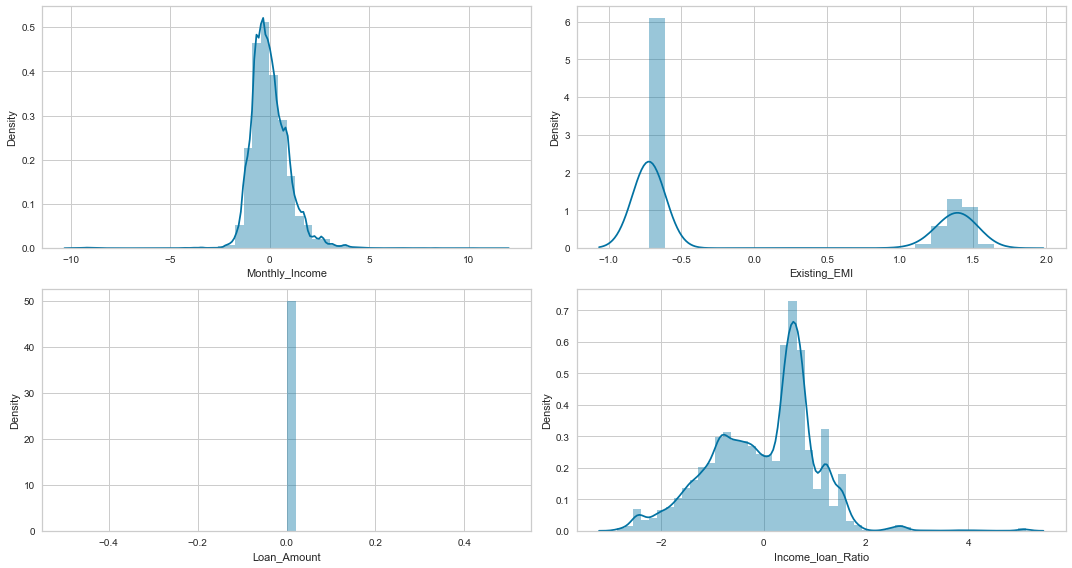

In [48]:
plt.rcParams['figure.figsize'] = [15, 8]

i = 1
for x in xtrain_num_trans:
    plt.subplot(2, 2, i)
    sns.distplot(xtrain_num_trans[x])
    i += 1
plt.tight_layout()

In [49]:
# As we can see that Power Transformer is not working well with Loan_Amount variable, therefore, we will go with
# a different transformation such as boxcox

In [53]:
xtrain_num = xtrain_new.iloc[:, :4]
xtest_num = xtest_new.iloc[:, :4]

xtrain_cat = xtrain_new.iloc[:, 4:]
xtest_cat = xtest_new.iloc[:, 4:]


pw = PowerTransformer()

xtrain_num_trans = pd.DataFrame(pw.fit_transform(xtrain_num), columns=xtrain_num.columns)
xtrain_num_trans['Loan_Amount'] = stats.boxcox(xtrain_num['Loan_Amount'])[0]

xtest_num_trans = pd.DataFrame(pw.fit_transform(xtest_num), columns=xtest_num.columns)
xtest_num_trans['Loan_Amount'] = stats.boxcox(xtest_num['Loan_Amount'])[0]


sc = StandardScaler()

xtrain_num_scaled = pd.DataFrame(sc.fit_transform(xtrain_num_trans), columns=xtrain_num_trans.columns)
xtrain_scaled = pd.concat([xtrain_num_scaled, xtrain_cat], axis=1)
print(xtrain_scaled.shape)

xtest_num_scaled = pd.DataFrame(sc.fit_transform(xtest_num_trans), columns=xtest_num_trans.columns)
xtest_scaled = pd.concat([xtest_num_scaled, xtest_cat], axis=1)
print(xtest_scaled.shape)

(52270, 28)
(13068, 28)


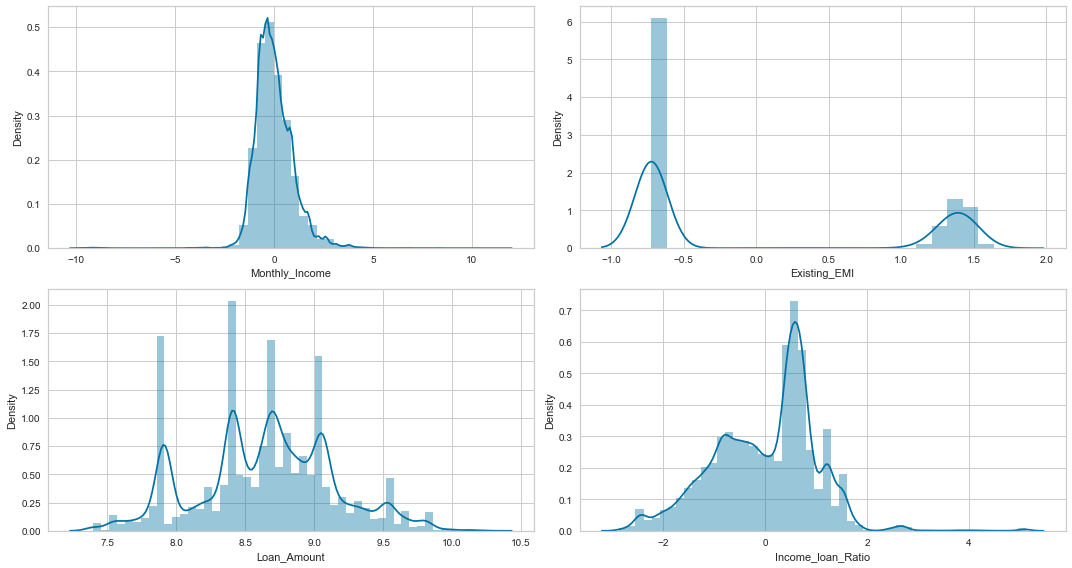

In [54]:
i = 1
for x in xtrain_num_trans:
    plt.subplot(2, 2, i)
    sns.distplot(xtrain_num_trans[x])
    i += 1
plt.tight_layout()

### Transformed and Scaled Model

In [66]:
lr = LogisticRegression(class_weight='balanced')
lr.fit(xtrain_scaled, ytrain)
print(lr.score(xtrain_scaled, ytrain), lr.score(xtest_scaled, ytest))

ypred_train_lr = lr.predict(xtrain_scaled)
print(confusion_matrix(ytrain, ypred_train_lr))
print(classification_report(ytrain, ypred_train_lr))

ypred_test_lr = lr.predict(xtest_scaled)
print(confusion_matrix(ytest, ypred_test_lr))
print(classification_report(ytest, ypred_test_lr))

0.7041515209489191 0.7021732476277931
[[36169 15287]
 [  177   637]]
              precision    recall  f1-score   support

           0       1.00      0.70      0.82     51456
           1       0.04      0.78      0.08       814

    accuracy                           0.70     52270
   macro avg       0.52      0.74      0.45     52270
weighted avg       0.98      0.70      0.81     52270

[[9018 3849]
 [  43  158]]
              precision    recall  f1-score   support

           0       1.00      0.70      0.82     12867
           1       0.04      0.79      0.08       201

    accuracy                           0.70     13068
   macro avg       0.52      0.74      0.45     13068
weighted avg       0.98      0.70      0.81     13068



### ROC AUC Curve

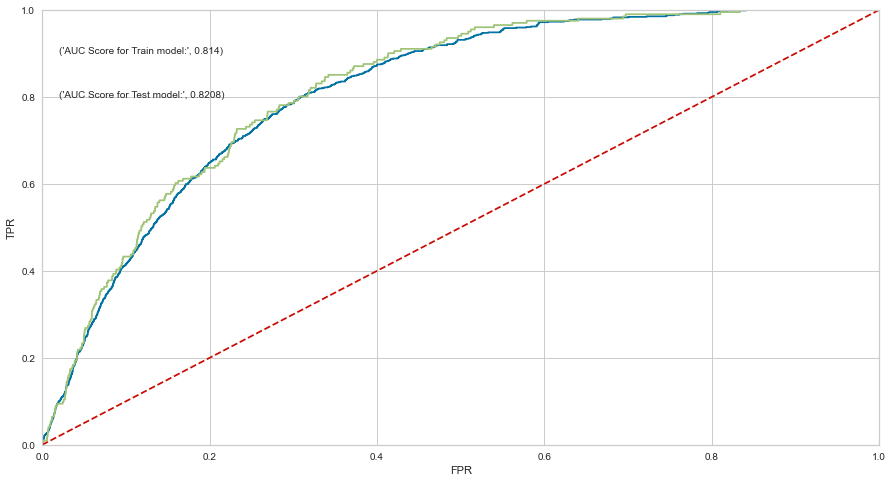

In [62]:
ypred_proba_train_lr = lr.predict_proba(xtrain_scaled)[:, 1]
ypred_proba_test_lr = lr.predict_proba(xtest_scaled)[:, 1]

fpr, tpr, thresholds = roc_curve(ytrain, ypred_proba_train_lr)
plt.plot(fpr, tpr)
plt.text(x = 0.02, y = 0.9, s = ('AUC Score for Train model:',round(roc_auc_score(ytrain, ypred_proba_train_lr),4)))

fpr, tpr, thresholds = roc_curve(ytest, ypred_proba_test_lr)
plt.plot(fpr, tpr)
plt.text(x = 0.02, y = 0.8, s = ('AUC Score for Test model:',round(roc_auc_score(ytest, ypred_proba_test_lr),4)))

plt.plot([0,1], '--r')

plt.xlabel("FPR")
plt.ylabel("TPR")

plt.xlim(0,1)
plt.ylim(0,1)
plt.grid(True)

#### Youden's Index

In [63]:
fpr, tpr, thresholds = roc_curve(ytrain, ypred_proba_train_lr)

youden_tab = pd.DataFrame({"TPR":tpr, "FPR":fpr, "Threshold":thresholds})
youden_tab['Difference'] = youden_tab['TPR'] - youden_tab['FPR']

youden_tab.sort_values(by='Difference', ascending=False).head(1)

,TPR,FPR,Threshold,Difference
2092,0.800983,0.309332,0.486751,0.491651


### Updated Threshold Model

In [64]:
lr = LogisticRegression(class_weight='balanced')
lr.fit(xtrain_scaled, ytrain)
print(lr.score(xtrain_scaled, ytrain), lr.score(xtest_scaled, ytest))

ypred_proba_train_lr = lr.predict_proba(xtrain_scaled)[:, 1]
ypred_train_lr = [1 if x>= 0.486 else 0 for x in ypred_proba_train_lr]
print(confusion_matrix(ytrain, ypred_train_lr))
print(classification_report(ytrain, ypred_train_lr))

ypred_proba_test_lr = lr.predict_proba(xtest_scaled)[:, 1]
ypred_test_lr = [1 if x>= 0.486 else 0 for x in ypred_proba_test_lr]
print(confusion_matrix(ytest, ypred_test_lr))
print(classification_report(ytest, ypred_test_lr))

0.7041515209489191 0.7021732476277931
[[35505 15951]
 [  162   652]]
              precision    recall  f1-score   support

           0       1.00      0.69      0.82     51456
           1       0.04      0.80      0.07       814

    accuracy                           0.69     52270
   macro avg       0.52      0.75      0.44     52270
weighted avg       0.98      0.69      0.80     52270

[[8871 3996]
 [  40  161]]
              precision    recall  f1-score   support

           0       1.00      0.69      0.81     12867
           1       0.04      0.80      0.07       201

    accuracy                           0.69     13068
   macro avg       0.52      0.75      0.44     13068
weighted avg       0.98      0.69      0.80     13068



In [65]:
# As there was not much difference observed in the threshold value and our model's performance did not improve,
# we are just going to go with the original scaled model with default threshold value

### Final Logistic Model
- with transformed and scaled data treated for multicollinearity

In [74]:
final_lr = LogisticRegression(class_weight='balanced')
final_lr.fit(xtrain_scaled, ytrain)
print(final_lr.score(xtrain_scaled, ytrain), final_lr.score(xtest_scaled, ytest))

ypred_train_final_lr = final_lr.predict(xtrain_scaled)
print(confusion_matrix(ytrain, ypred_train_final_lr))
print(classification_report(ytrain, ypred_train_final_lr))

ypred_test_final_lr = final_lr.predict(xtest_scaled)
print(confusion_matrix(ytest, ypred_test_final_lr))
print(classification_report(ytest, ypred_test_final_lr))

0.7041515209489191 0.7021732476277931
[[36169 15287]
 [  177   637]]
              precision    recall  f1-score   support

           0       1.00      0.70      0.82     51456
           1       0.04      0.78      0.08       814

    accuracy                           0.70     52270
   macro avg       0.52      0.74      0.45     52270
weighted avg       0.98      0.70      0.81     52270

[[9018 3849]
 [  43  158]]
              precision    recall  f1-score   support

           0       1.00      0.70      0.82     12867
           1       0.04      0.79      0.08       201

    accuracy                           0.70     13068
   macro avg       0.52      0.74      0.45     13068
weighted avg       0.98      0.70      0.81     13068



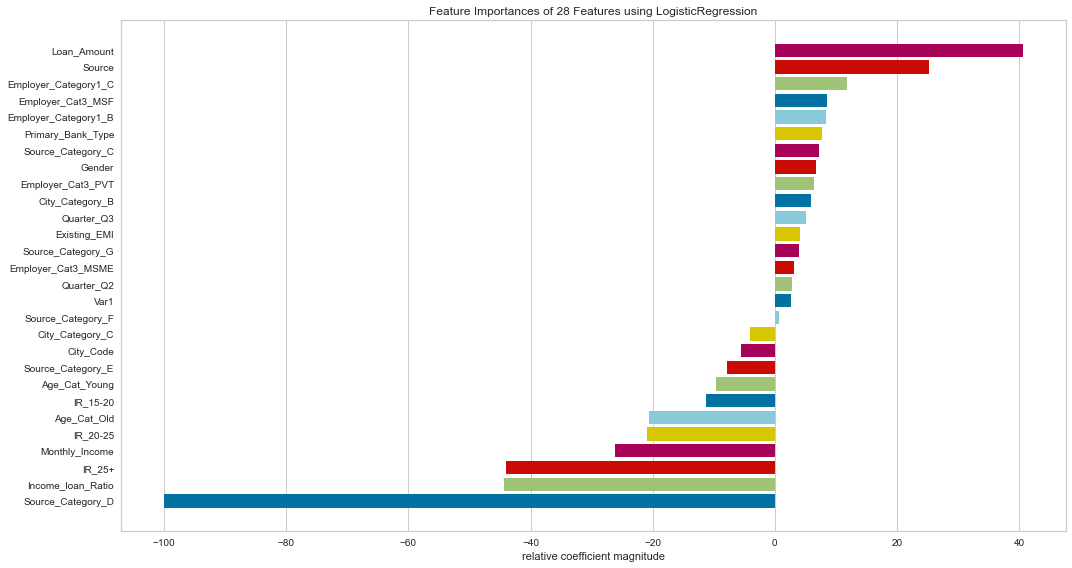

<AxesSubplot:title={'center':'Feature Importances of 28 Features using LogisticRegression'}, xlabel='relative coefficient magnitude'>

In [79]:
viz = FeatureImportances(final_lr, stack=False)
viz.fit(xtrain_scaled, ytrain)
viz.show()

In [84]:
# These are the coefficients of our variables as to how they are affecting the log of odds of our target(Approved).
# High negative value will result in a low value after exponential which will depict the change in odds of approval
# with unit change in our variable and vice versa for high positive value